# Basic RNN
- Objective: to understand basics of RNN & LSTM

## Recurrent Neural Networks
- Feedforward neural networks (e.g. MLPs and CNNs) are powerful, but they are not optimized to handle "sequential" data
- In other words, they do not possess "memory" of previous inputs
- For instance, consider the case of translating a corpus. You need to consider the **"context"** to guess the next word to come forward



<br>
- RNNs are suitable for dealing with sequential format data since they have **"recurrent"** structure
- To put it differently, they keep the **"memory"** of earlier inputs in the sequence
</br>
<img src="http://www.wildml.com/wp-content/uploads/2015/09/rnn.jpg" style="width: 600px"/>

<br>
- However, in order to reduce the number of parameters, every layer of different time steps shares same parameters
</br>

<img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png" style="width: 600px"/>

## Load Dataset

In [1]:
import numpy as np

from sklearn.metrics import accuracy_score
from keras.datasets import reuters
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [2]:
# parameters for data load
num_words = 30000
maxlen = 50
test_split = 0.3

In [3]:
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words = num_words, maxlen = maxlen, test_split = test_split)

D:\Anaconda\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
D:\Anaconda\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [4]:
totl= []
for i in range(X_train.shape[0]):
    leng = len(X_train[i])
    totl.append(leng)
    

In [5]:
import numpy as np
np.max(totl)

49

In [6]:
# pad the sequences with zeros 
# padding parameter is set to 'post' => 0's are appended to end of sequences
X_train = pad_sequences(X_train, padding = 'post')
X_test = pad_sequences(X_test, padding = 'post')

In [7]:
X_train

array([[   1,  245,  273, ...,    0,    0,    0],
       [   1,  486,  341, ...,    0,    0,    0],
       [   1,  245,  273, ...,    0,    0,    0],
       ...,
       [   1,   53,  102, ...,    0,    0,    0],
       [   1,   53,   46, ...,    0,    0,    0],
       [   1, 3840,  341, ...,    0,    0,    0]])

In [8]:
X_train = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))

In [9]:
## concatination of testy and trainy
y_data = np.concatenate((y_train, y_test))

In [10]:
## one hot encoding of y data
y_data = to_categorical(y_data)

In [11]:
y_data.shape

(1994, 46)

In [12]:
### splitting train and test data again

y_train = y_data[:1395]
y_test = y_data[1395:]

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1395, 49, 1)
(599, 49, 1)
(1395, 46)
(599, 46)


## 1. Vanilla RNN
- Vanilla RNNs have a simple structure
- However, they suffer from the problem of "long-term dependencies"
- Hence, they are not able to keep the **sequential memory" for long

<img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-SimpleRNN.png" style="width: 600px"/>

### Why TANH ??



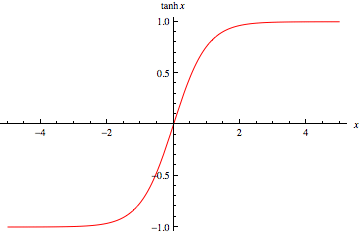

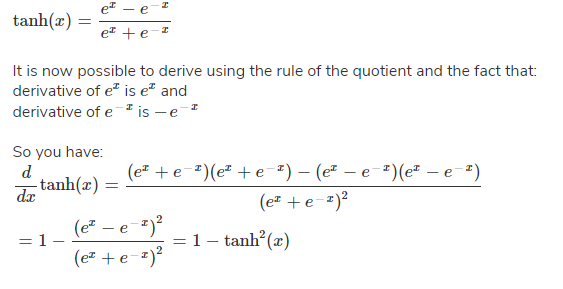

### Tanh

Mathematical expression: tanh(z) = [exp(z) - exp(-z)] / [exp(z) + exp(-z)]

1st order derivative: tanh'(z) = 1 - ([exp(z) - exp(-z)] / [exp(z) + exp(-z)])^2 = 1 - tanh^2(z)

Advantages:

* (1) Often found to converge faster in practice
* (2) Gradient computation is less expensive

To overcome the vanishing gradient problem, we need a function whose second derivative can sustain for a long range before going to zero. Tanh is a good function with the above property.

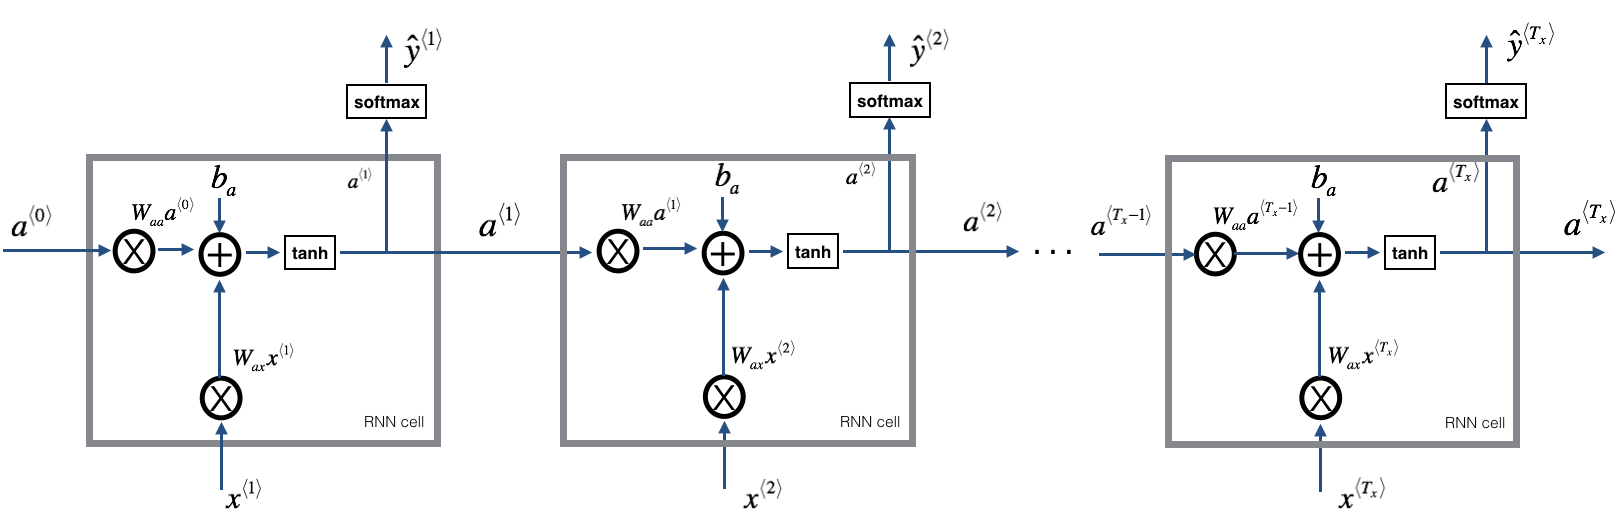

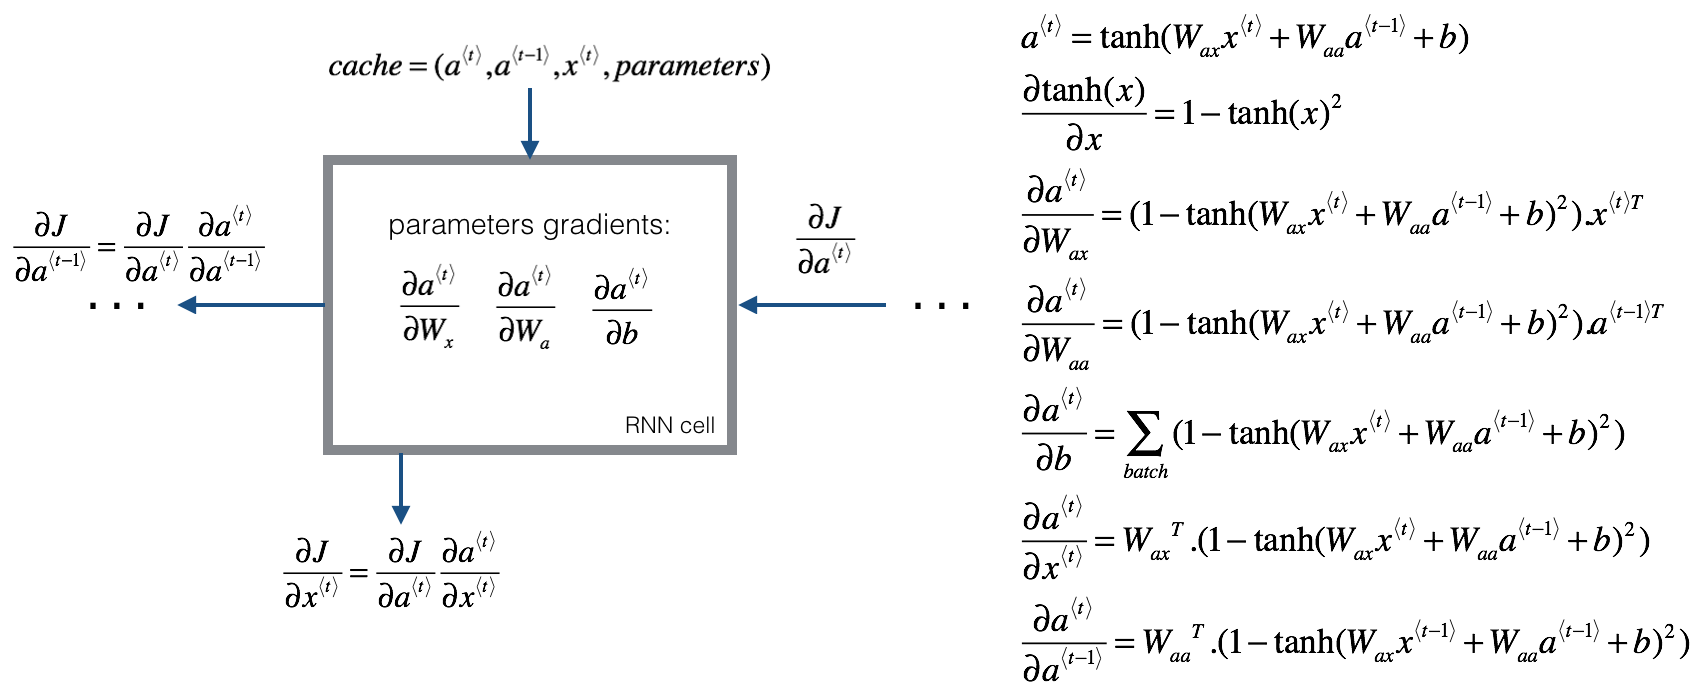

In [14]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Activation
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier

In [15]:

### creating rnn 
def vanilla_rnn():
    model = Sequential() ### initiating network
    model.add(SimpleRNN(60, input_shape = (49,1), return_sequences = False))
    model.add(Dense(46))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [16]:
model = KerasClassifier(build_fn = vanilla_rnn, epochs = 200, batch_size = 50, verbose = 1)

In [17]:
model.fit(X_train, y_train)

Epoch 1/200
28/28 [==============================] - 6s 17ms/step - loss: 3.1831 - accuracy: 0.3501
Epoch 2/200
28/28 [==============================] - 0s 15ms/step - loss: 1.3913 - accuracy: 0.6827
Epoch 3/200
28/28 [==============================] - 0s 14ms/step - loss: 1.2094 - accuracy: 0.7192
Epoch 4/200
28/28 [==============================] - 0s 15ms/step - loss: 1.1712 - accuracy: 0.7174
Epoch 5/200
28/28 [==============================] - 0s 14ms/step - loss: 1.1623 - accuracy: 0.7105
Epoch 6/200
28/28 [==============================] - 0s 14ms/step - loss: 1.1745 - accuracy: 0.7179
Epoch 7/200
28/28 [==============================] - 0s 14ms/step - loss: 1.2037 - accuracy: 0.6977
Epoch 8/200
28/28 [==============================] - 0s 15ms/step - loss: 1.2402 - accuracy: 0.6991
Epoch 9/200
28/28 [==============================] - 0s 14ms/step - loss: 1.1498 - accuracy: 0.7095
Epoch 10/200
28/28 [==============================] - 0s 15ms/step - loss: 1.1272 - accuracy: 0.7239

28/28 [==============================] - 0s 14ms/step - loss: 0.9050 - accuracy: 0.7422
Epoch 81/200
28/28 [==============================] - 0s 14ms/step - loss: 1.0283 - accuracy: 0.7092
Epoch 82/200
28/28 [==============================] - 0s 15ms/step - loss: 0.9098 - accuracy: 0.7383 0s - loss: 0.9024 - accuracy: 0.
Epoch 83/200
28/28 [==============================] - 0s 15ms/step - loss: 0.8222 - accuracy: 0.7569
Epoch 84/200
28/28 [==============================] - 0s 15ms/step - loss: 0.8965 - accuracy: 0.7449
Epoch 85/200
28/28 [==============================] - 0s 14ms/step - loss: 0.9079 - accuracy: 0.7416
Epoch 86/200
28/28 [==============================] - 0s 15ms/step - loss: 0.9309 - accuracy: 0.7327
Epoch 87/200
28/28 [==============================] - 0s 14ms/step - loss: 0.8920 - accuracy: 0.7543
Epoch 88/200
28/28 [==============================] - 0s 15ms/step - loss: 0.9028 - accuracy: 0.7218 0s - loss: 0.8747 - accura
Epoch 89/200
28/28 [========================

28/28 [==============================] - 0s 14ms/step - loss: 0.8433 - accuracy: 0.7534
Epoch 159/200
28/28 [==============================] - 0s 14ms/step - loss: 0.8033 - accuracy: 0.7481
Epoch 160/200
28/28 [==============================] - 0s 14ms/step - loss: 0.7686 - accuracy: 0.7519
Epoch 161/200
28/28 [==============================] - 0s 14ms/step - loss: 0.8140 - accuracy: 0.7587
Epoch 162/200
28/28 [==============================] - 0s 14ms/step - loss: 0.8091 - accuracy: 0.7429
Epoch 163/200
28/28 [==============================] - 0s 14ms/step - loss: 0.7602 - accuracy: 0.7609
Epoch 164/200
28/28 [==============================] - 0s 15ms/step - loss: 0.7837 - accuracy: 0.7498
Epoch 165/200
28/28 [==============================] - 0s 11ms/step - loss: 0.8237 - accuracy: 0.7471
Epoch 166/200
28/28 [==============================] - 0s 14ms/step - loss: 0.7916 - accuracy: 0.7488
Epoch 167/200
28/28 [==============================] - 0s 14ms/step - loss: 0.7974 - accuracy: 0

In [26]:
y_pred = model.predict(X_test)

12/12 [==============================] - 0s 2ms/step


In [29]:
y_pred

array([ 3,  3,  3,  3,  3,  4,  4,  4,  3,  3,  3,  3,  3,  3,  3,  4,  3,
        3,  3,  3,  3,  4,  3,  3,  3,  4,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  4,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  3,  3,  3,  4,  3,  3,
        3,  3,  2,  3,  3,  3,  3,  4,  4, 10,  3,  3,  3,  3,  3,  3,  3,
        2,  3,  4,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3, 17,  3,
        3,  3,  4,  3,  3,  4,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3, 24,  3,  3,  3,  3,  3,  3,  3,  4,  3,  3,  3,
        4,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3, 24,  3,  3,
        3,  3,  3,  3,  4,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  3,
        3,  3,  3,  3,  4,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  3,  3,  3,  3,  3,  3,
        3,  4,  3,  3,  4,  3,  3,  3,  3,  3,  3,  4,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3

In [32]:
y_test_ = np.argmax(y_test, axis = 1)

In [33]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [28]:
print(accuracy_score(y_pred, y_test_))

0.7479131886477463


## 2. Stacked Vanilla RNN
- RNN layers can be stacked to form a deeper network

<img src="https://lh6.googleusercontent.com/rC1DSgjlmobtRxMPFi14hkMdDqSkEkuOX7EW_QrLFSymjasIM95Za2Wf-VwSC1Tq1sjJlOPLJ92q7PTKJh2hjBoXQawM6MQC27east67GFDklTalljlt0cFLZnPMdhp8erzO" style="width: 500px"/>

In [20]:
## creating stacked rnn
def stacked_vanilla_rnn():
    model = Sequential() ## initiation
    ## first layer of cell ( each cell will give an output and hence return sequence is set True)
    model.add(SimpleRNN(50, input_shape = (49,1), return_sequences = True))   # return_sequences parameter has to be set True to stack
    ## second or final layer of cell and since we are using it only for topic classification, we need only output from last cell
    model.add(SimpleRNN(50, return_sequences = False))
    #### adding final 46 neurons ( 46 categories are there for news labels)
    model.add(Dense(46))
    
    ### softmax for distribution of probability in those 46 classes
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001) ## optimizer 
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [21]:
model = KerasClassifier(build_fn = stacked_vanilla_rnn, epochs = 200, batch_size = 50, verbose = 1)

In [22]:
model.fit(X_train, y_train)

Epoch 1/200
1395/1395 [==============================] - 3s 2ms/step - loss: 2.6474 - acc: 0.5075
Epoch 2/200
1395/1395 [==============================] - 2s 2ms/step - loss: 1.3101 - acc: 0.7147
Epoch 3/200
1395/1395 [==============================] - 2s 2ms/step - loss: 1.1880 - acc: 0.7147
Epoch 4/200
1395/1395 [==============================] - 2s 2ms/step - loss: 1.1711 - acc: 0.7147
Epoch 5/200
1395/1395 [==============================] - 2s 2ms/step - loss: 1.1629 - acc: 0.7147
Epoch 6/200
1395/1395 [==============================] - 2s 2ms/step - loss: 1.1593 - acc: 0.7147
Epoch 7/200
1395/1395 [==============================] - 2s 2ms/step - loss: 1.1541 - acc: 0.7147
Epoch 8/200
1395/1395 [==============================] - 2s 2ms/step - loss: 1.1519 - acc: 0.7147
Epoch 9/200
1395/1395 [==============================] - 2s 2ms/step - loss: 1.1503 - acc: 0.7147
Epoch 10/200
1395/1395 [==============================] - 2s 2ms/step - loss: 1.1472 - acc: 0.7147
Epoch 11/200
1395/1

1395/1395 [==============================] - 3s 2ms/step - loss: 0.5565 - acc: 0.8079
Epoch 165/200
1395/1395 [==============================] - 4s 3ms/step - loss: 0.5531 - acc: 0.8115
Epoch 166/200
1395/1395 [==============================] - 4s 3ms/step - loss: 0.5425 - acc: 0.8165
Epoch 167/200
1395/1395 [==============================] - 4s 3ms/step - loss: 0.5346 - acc: 0.8186
Epoch 168/200
1395/1395 [==============================] - 2s 2ms/step - loss: 0.5352 - acc: 0.8208
Epoch 169/200
1395/1395 [==============================] - 4s 3ms/step - loss: 0.5206 - acc: 0.8237
Epoch 170/200
1395/1395 [==============================] - 4s 3ms/step - loss: 0.5171 - acc: 0.8229
Epoch 171/200
1395/1395 [==============================] - 2s 2ms/step - loss: 0.5060 - acc: 0.8265
Epoch 172/200
1395/1395 [==============================] - 4s 3ms/step - loss: 0.5162 - acc: 0.8251
Epoch 173/200
1395/1395 [==============================] - 4s 3ms/step - loss: 0.5234 - acc: 0.8280
Epoch 174/200


In [23]:
y_pred = model.predict(X_test)

599/599 [==============================] - 1s 2ms/step


In [24]:
print(accuracy_score(y_pred, y_test_))

0.7562604340567612


## 3. LSTM
- LSTM (long short-term memory) is an improved structure to solve the problem of long-term dependencies

<img src="http://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png" style="width: 600px"/>

In [1]:
#trump is president of usa and his age is 50 yrs 

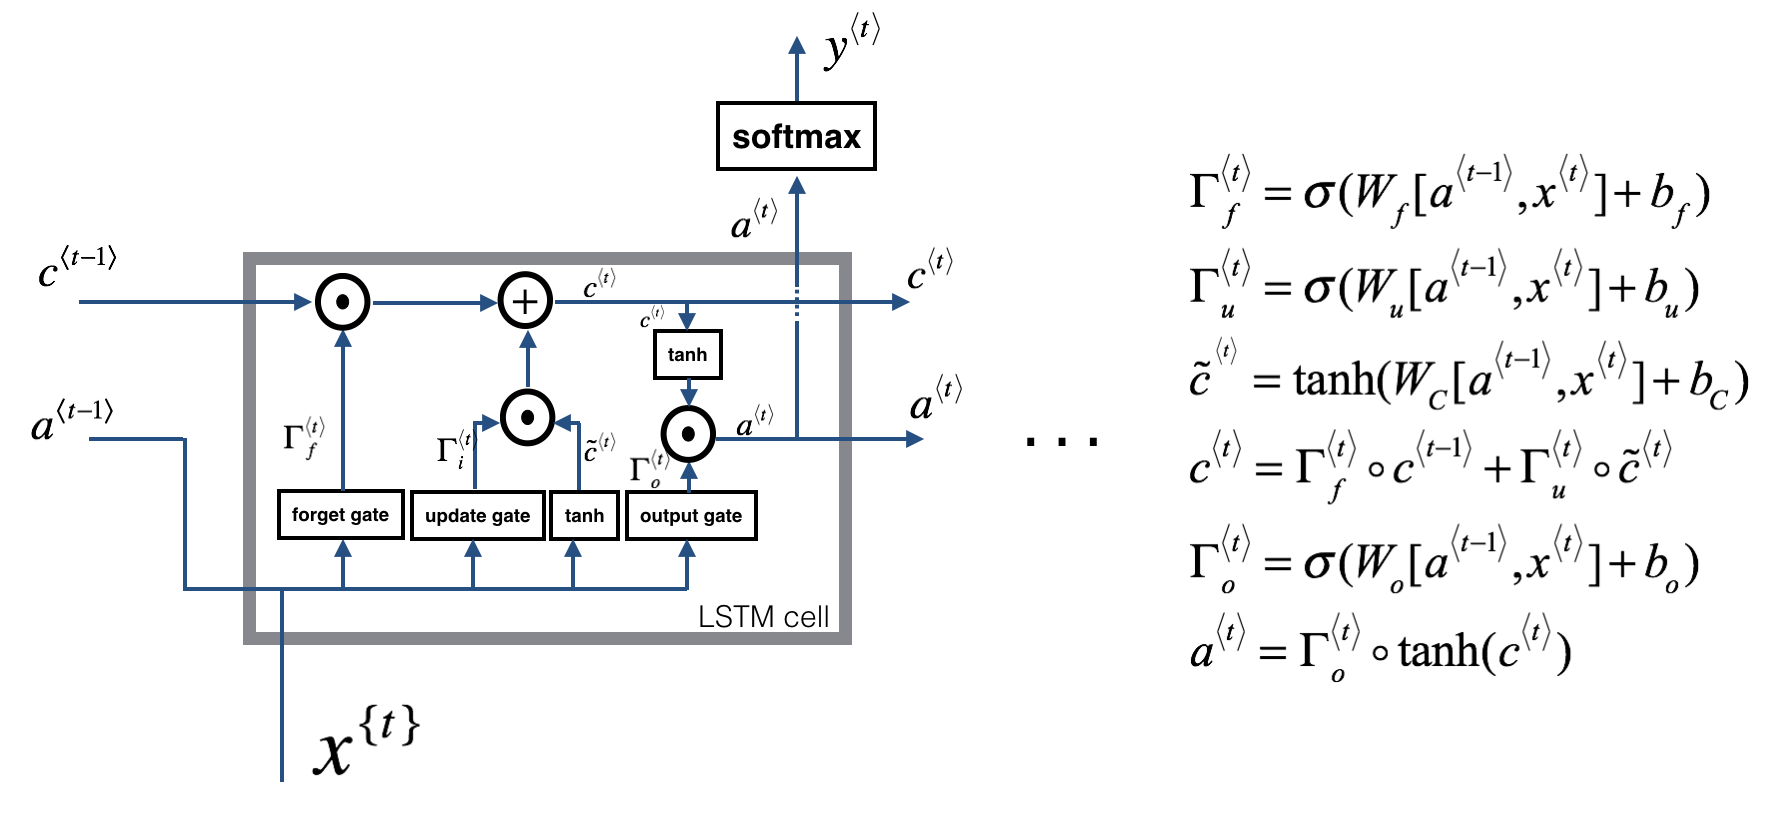

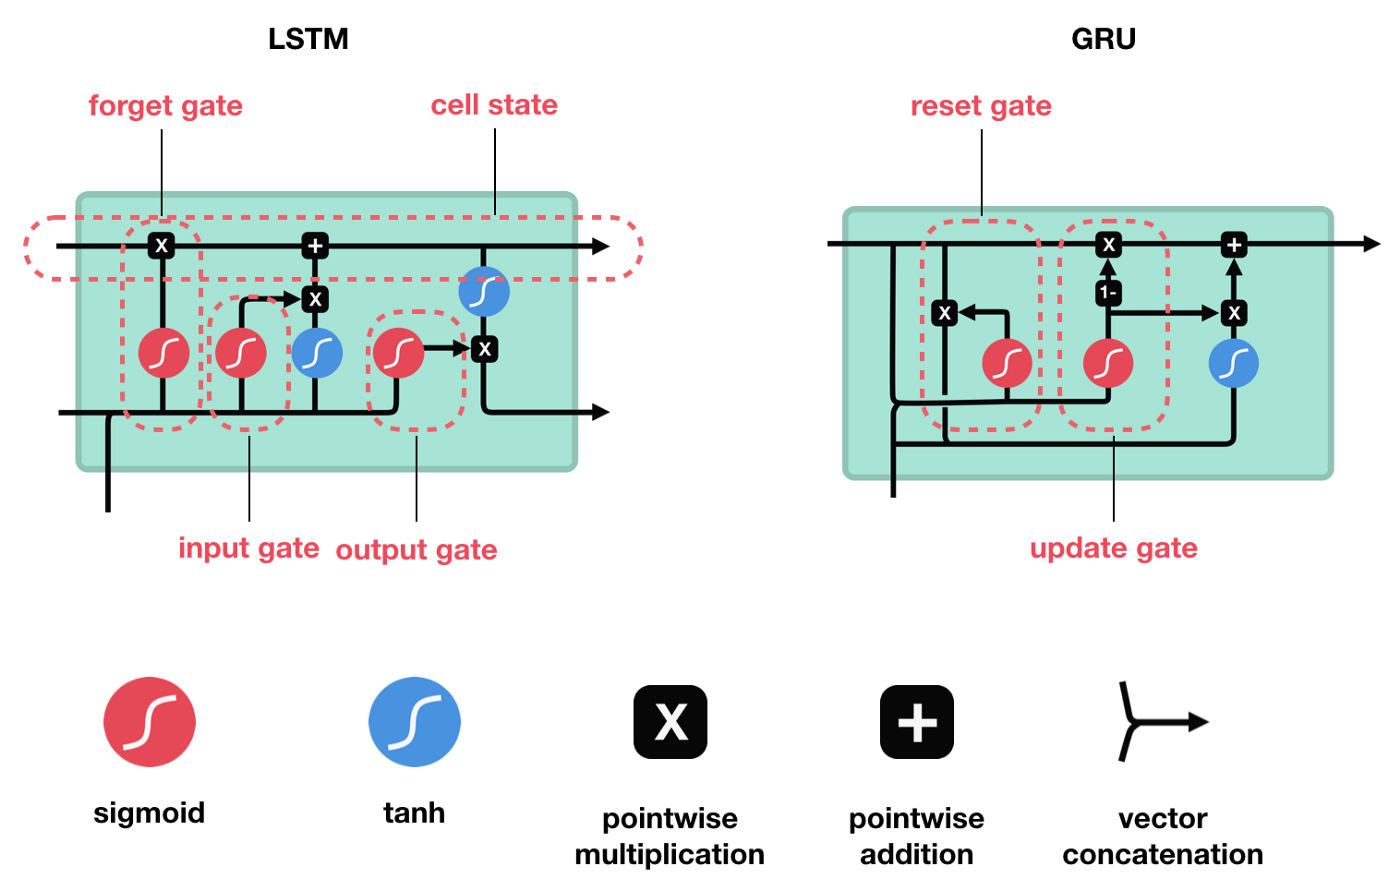

### forget gate

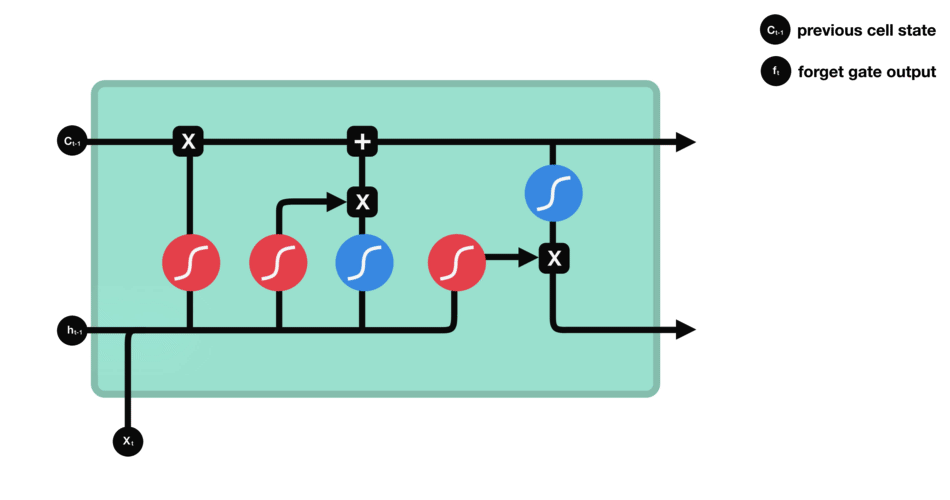

### Input gate


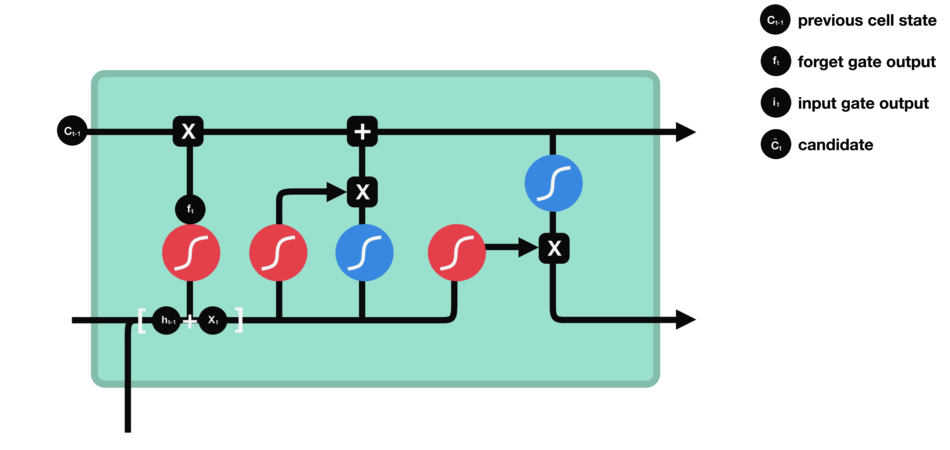

### Cell state


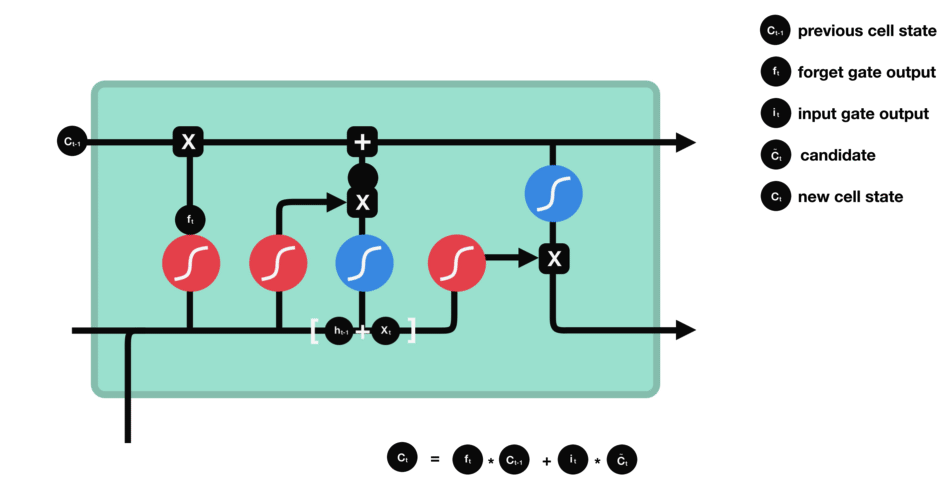

### Output gate


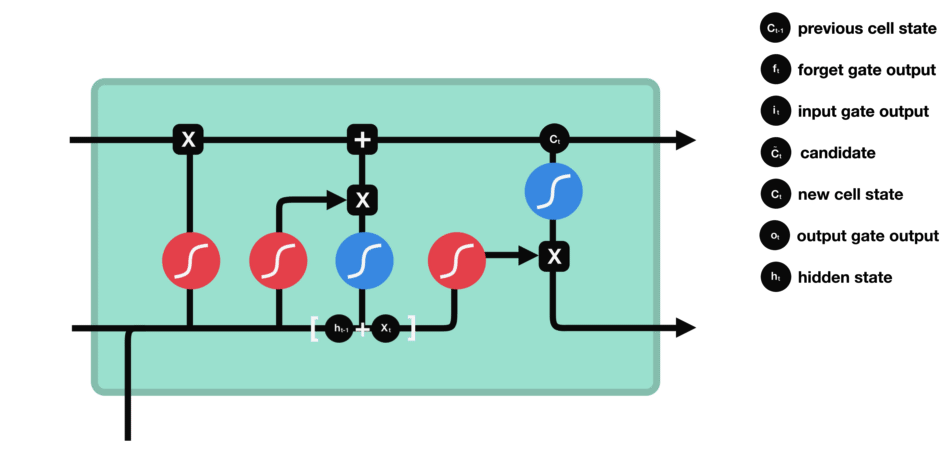



To review, the Forget gate decides what is relevant to keep from prior steps. The input gate decides what information is relevant to add from the current step. The output gate determines what the next hidden state should be

###### reference article https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21

In [19]:
from keras.layers import LSTM

In [20]:
def lstm():
    model = Sequential() ## initiate 
    model.add(LSTM(50, input_shape = (49,1), return_sequences = False)) ## LSTM cell for input sequence of 49 words ( tokens)
    ### we only need last output so return sequence is False
    model.add(Dense(46)) ### 46 lables ( categories) of news articles
    model.add(Activation('softmax')) ## activation
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [21]:
model = KerasClassifier(build_fn = lstm, epochs = 200, batch_size = 50, verbose = 1)

In [ ]:
model.fit(X_train, y_train)

Epoch 1/200
1395/1395 [==============================] - 9s 6ms/step - loss: 3.4349 - acc: 0.5527
Epoch 2/200
1395/1395 [==============================] - 3s 2ms/step - loss: 1.5083 - acc: 0.7147
Epoch 3/200
1395/1395 [==============================] - 3s 2ms/step - loss: 1.1920 - acc: 0.7147
Epoch 4/200
1395/1395 [==============================] - 3s 2ms/step - loss: 1.1630 - acc: 0.7147
Epoch 5/200
1395/1395 [==============================] - 3s 2ms/step - loss: 1.1152 - acc: 0.7147
Epoch 6/200
1395/1395 [==============================] - 3s 2ms/step - loss: 1.0329 - acc: 0.7147
Epoch 7/200
1395/1395 [==============================] - 3s 2ms/step - loss: 0.9399 - acc: 0.7541
Epoch 8/200
1395/1395 [==============================] - 3s 2ms/step - loss: 0.8915 - acc: 0.7986
Epoch 9/200
1395/1395 [==============================] - 3s 2ms/step - loss: 0.8576 - acc: 0.8057
Epoch 10/200
1395/1395 [==============================] - 3s 2ms/step - loss: 0.8580 - acc: 0.7957
Epoch 11/200
1395/1

In [83]:
y_pred = model.predict(X_test)

500/599 [========================>.....] - ETA: 0s

In [84]:
# accuracy improves by adopting LSTM structure
print(accuracy_score(y_pred, y_test_))

0.844741235392


## 4. Stacked LSTM
- LSTM layers can be stacked as well

In [85]:
def stacked_lstm():
    model = Sequential()
    model.add(LSTM(50, input_shape = (49,1), return_sequences = True))
    model.add(LSTM(50, return_sequences = False))
    model.add(Dense(46))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [86]:
model = KerasClassifier(build_fn = stacked_lstm, epochs = 200, batch_size = 50, verbose = 1)

In [ ]:
model.fit(X_train, y_train)

In [88]:
y_pred = model.predict(X_test)

500/599 [========================>.....] - ETA: 0s

In [89]:
print(accuracy_score(y_pred, y_test_))

0.858096828047
